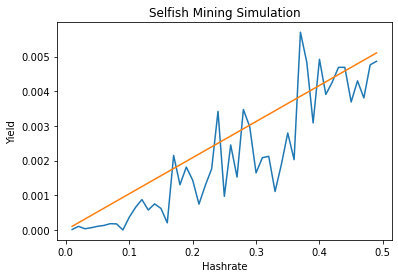

In [1]:
import math
import os
import random as rnd
rnd.seed()
import time
import tkinter
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go
from matplotlib.backends.backend_tkagg import (FigureCanvasTkAgg,
                                              NavigationToolbar2Tk)
from matplotlib.figure import Figure
from plotly.subplots import make_subplots



class Blockchain:
    """
    Blockchain class composed of blocks
    """
    def __init__(self):
        self.blocks = []
    
    def __repr__(self):
        return "%s" % self.blocks 

    def addBlock(self):
        self.blocks.append("")

    def getBlocks(self):
        
        return self.blocks

    def modifChain(self, newChain):
        self.blocks = []
        for i in range(0, len(newChain)):
            self.blocks.append(newChain[i])

# Selfish mining attack

import matplotlib.pyplot as plt
import numpy as np

def attackCycle(q, connectivite, chaine, NbrCycles):
    """
    We simulate an attack
    q is the hashrate
    """
    blocksMined = 0
    coinbase = 6.25
    bchainAttaquant = Blockchain()
    tailleInitiale = len(chaine.getBlocks())
    bchainOff = chaine
    blockCounterBeforeAdjustment = 0
    timeToAdjustment = 0
    miningTime = 600
    duree = 0
    n = 1
    esperanceGains = 0
    while n <= NbrCycles:
        bchainAttaquant.modifChain(bchainOff.getBlocks()) 

        
        counter = 0

        # Attack

        while True:

            # # Difficulty adustment
            if (blockCounterBeforeAdjustment >= 2016):
                miningTime = miningTime * (2016 * 600) / timeToAdjustment
                timeToAdjustment = 0
                blockCounterBeforeAdjustment = 0

            duree += miningTime
            timeToAdjustment += miningTime

            # The attacker mines with a probability q
            resultat = np.random.binomial(1, q)

            ecartEntreChaines = len(bchainAttaquant.getBlocks()) - len(bchainOff.getBlocks())

            # If H mines a block, different scenarios
            if(resultat == 0):
                if(counter == 0):
                    bchainOff.addBlock()
                    break
                #scenatio 1, If S mines first but H mines a block before S mines a second one, STATE 0'
                if(counter == 1 & ecartEntreChaines == 1):
                    bchainOff.addBlock()
                    blockCounterBeforeAdjustment += 1

                    # Competition, 3 solutions: q / connectivite * p / (1- connectivite) * p
                    #the attackers mines on top of his fork
                    tmp = rnd.random()
                    if(tmp < q):
                        bchainAttaquant.addBlock()
                        bchainOff.modifChain(bchainAttaquant.getBlocks())
                        blocksMined += 2  # Supposed to be + 2
                        n += 1
                        # duree += miningTime

                        break
                    else:
                        #honest mine on top of attackers' fork
                        if(tmp < (connectivite)*(1 - q)):
                            bchainOff.modifChain(bchainAttaquant.getBlocks())
                            blocksMined += 1  # Supposed to be + 1
                            bchainOff.addBlock()
                            # duree += miningTime
                            n += 1
                            break
                        #honest mine on honest chain
                        else:
                            bchainOff.addBlock()
                            n += 1
                            # duree += miningTime
                            break
                #If S mines twice but H mines before the third block, S publishes its fork and earn 2 coinbases                    
                if(counter == 2 & ecartEntreChaines == 2):
                    bchainOff.addBlock()
                    blockCounterBeforeAdjustment += 1
                    bchainOff.modifChain(bchainAttaquant.getBlocks())
                    blocksMined += 2
                    n +=1
                    break

                # If len(Attacker Fork) - len(Official fork) >=2 and if H mines a block
                # the attacker publishes its fork of the size of the honnest chain
                if(ecartEntreChaines > 2):
                    bchainOff.addBlock()
                    blockCounterBeforeAdjustment += 1
                    tailleOff = len(bchainOff.getBlocks())
                    bchainOff.modifChain(bchainAttaquant.getBlocks()[0:tailleOff-1])
                    blocksMined += 1
                    counter -=1
                    
            # the attacker mines another block        
            if(resultat == 1):
                bchainAttaquant.addBlock()
                counter += 1

        esperanceGains = (blocksMined * coinbase)/(duree) 

    return esperanceGains


def calculateRatiosForListOfHashrates(gamma, NbrCycles):
    listeDeHashrate = [0] * 49
    listeEsperanceGains = [0] * 49
    for idx in range(1,50):
        bitcoin = Blockchain()

        listeEsperanceGains[idx-1] = attackCycle(idx/100, gamma, bitcoin, NbrCycles)
        listeDeHashrate[idx-1] = idx/100

    return listeEsperanceGains, listeDeHashrate

#Fonction pour mettre à jour les params.
def simulationDesAttaques():
    listeEsperanceGains, listeDeHashrate = calculateRatiosForListOfHashrates(10/100, 10)

    plt.plot(listeDeHashrate, listeEsperanceGains, label='Selfish Mining')
    y1 = [0] * 49
    for i in range(len(y1)):
        y1[i]=(listeDeHashrate[i]*6.25)/600
    plt.plot(listeDeHashrate, y1, label='Honest Strategy')
    plt.xlabel('Hashrate')
    plt.ylabel('Yield')

    plt.title('Selfish Mining Simulation')
    plt.show()

simulationDesAttaques()
